<a href="https://colab.research.google.com/github/marcelalozano27-ship-it/machine-learning-2026-spring/blob/main/CA_03_final_marcelabrandon_github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CA-03 Decision Tree Algorithm
##### Marcela Lozano and Brandon Richard



#Step 1: Data Source and Contents

In [1]:
!pip install autoviz ydata-profiling sweetviz graphviz


In [2]:
# gather data from "https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true" and save it as a dataframe called "census_data"
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
from IPython.display import display

from autoviz.AutoViz_Class import AutoViz_Class
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
#!pip install graphviz
import graphviz
from sklearn.tree import plot_tree
import time
df = pd.read_csv("https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true")
# print the first 5 rows of the dataframe
print(df.head())
# print the shape of the dataframe
print(df.shape)
# print the column names of the dataframe
print(df.columns)

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
  hours_per_week_bin occupation_bin msr_bin  capital_gl_bin race_sex_bin  \
0      b. 31-40       b. Mid - Low    b. Mid     c. > 0        c. High     
1       a. 0-30            e. High   c. High     a. = 0        c. High     
2      b. 31-40             a. Low    b. Mid     a. = 0        c. High     
3      b. 31-40             a. Low   c. High     a. = 0         b. Mid     
4      b. 31-40            e. High   c. High     a. = 0         a. Low     

  education_num_bin education_bin workclass_bin      age_bin        flag   y  
0         c. 13      c. Bachelors    b. income    d. 36-40 & 56-60  train  0  
1         c. 13      c. Bachelors    b. income            e. 40-55  train  0  
2 

In [3]:
display(df.describe(include="all"))



,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
count,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842.000000
unique,5,5,3,3,3,5,5,2,5,2,NaN
top,b. 31-40,c. Mid - Mid,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,e. 40-55,train,NaN
freq,26639,13971,22047,42525,29737,30324,30324,46012,13963,32561,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.239282
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.426649
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


The Census data contains 48,842 observations with discretized demographic and socioeconomic attributes about individuals and the goal is to predict the individual's income category (>$50k, <$50k)

The continuous variables have been transformed into categorical bins (age ranges, education levels, hours worked, etc) which increases interpretability and model stability. The target variable 'y' is the income class and this analysis will include supervised binary classifications.
This makes the most sense since income prediction can be influenced more by category levels rather than requiring exact numeric values. The categorical groupings work best with decision trees since we have clear splits. The binning will also help reduce the noise and prevent overfitting.


###Question 1: Why does discretization make sense?
Discretization(binning) is important in this case because our goal is to predict an income category (>50k  or <50k) from demographic factors. Many of the original continuous variables like age or hours worked are more meaningful when we use ranges rather than exact values. If we use for example "9-12 years of education", this captures a stable work stage and helps to reduce noise caused by unnecessary numerical differences. Binning also makes sense for interpretability of the model as the splits are more interpretable than single values.

###Question 2: What issues arise if variables are not discretized?

If we did not use discretization, we would run the risk of the decision tree creating splits on very specific numeric cutoffs and and it won't generalize well to new people. If variables are not discretized we run the risk of overfitting and an unstable model that is hard to interpret.

# Step 2: Data Quality Analysis (DQA)

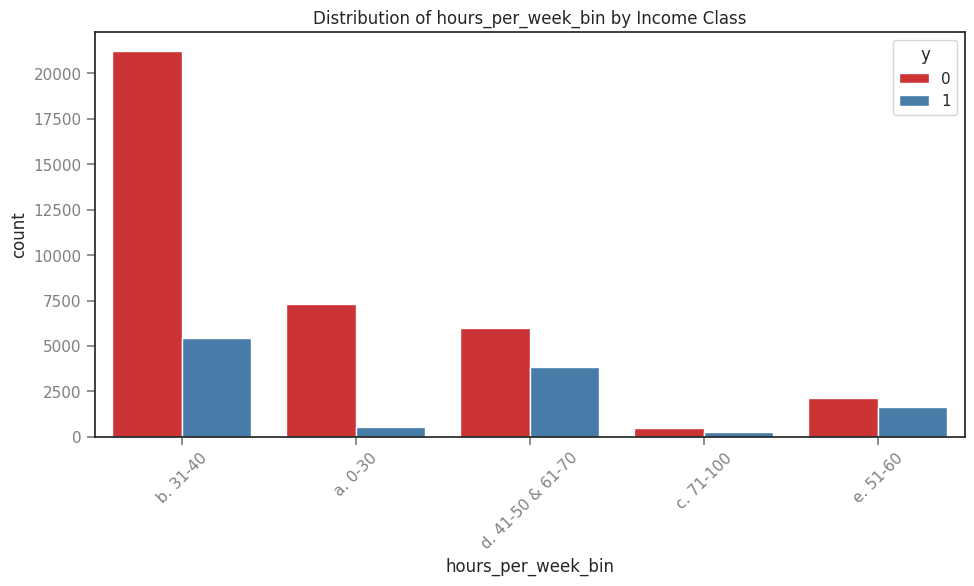

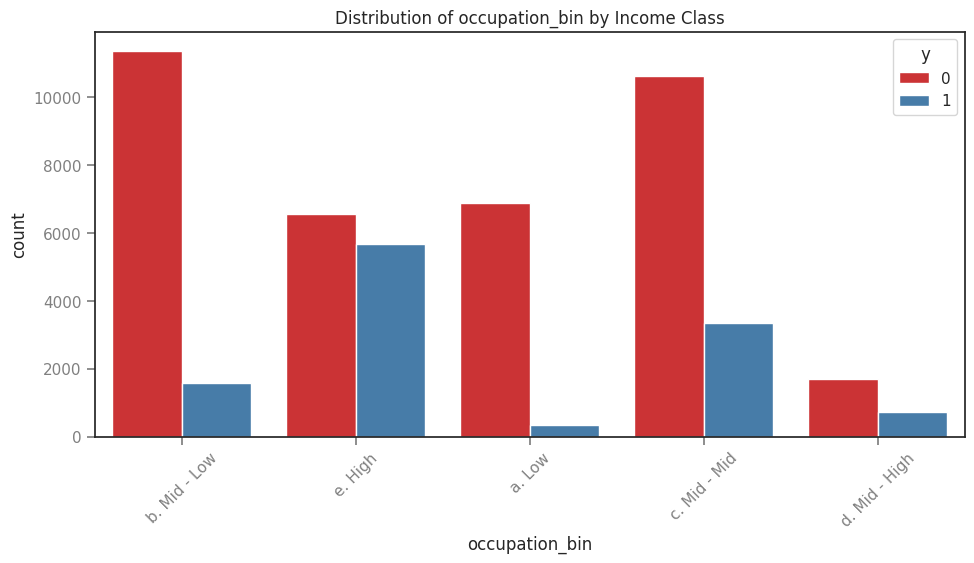

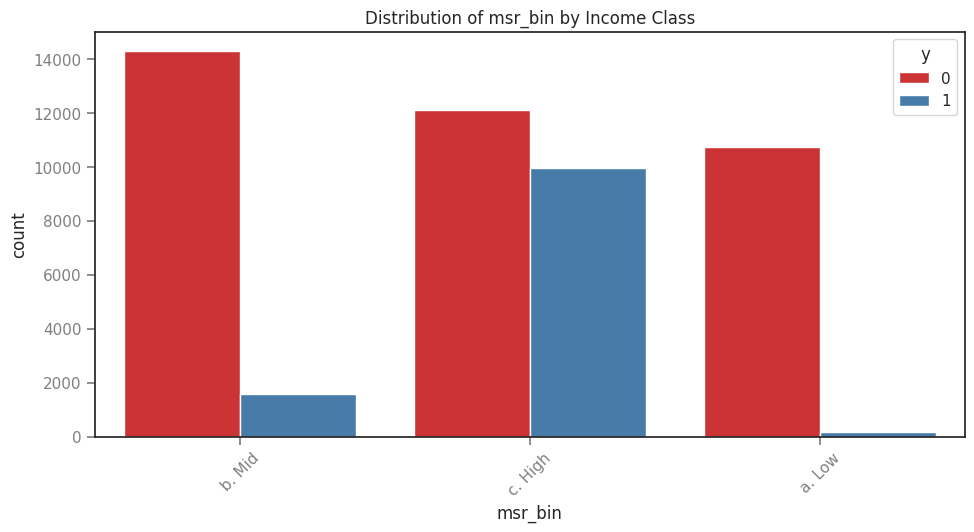

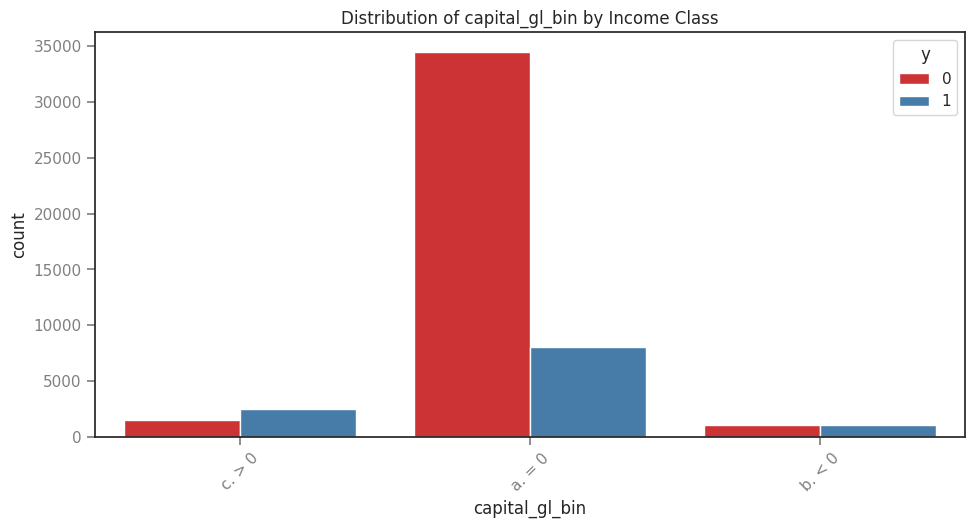

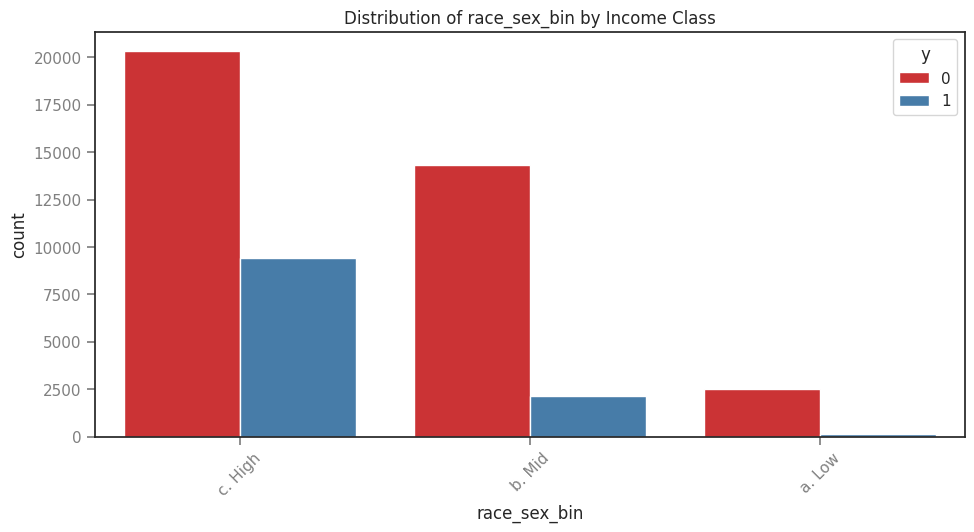

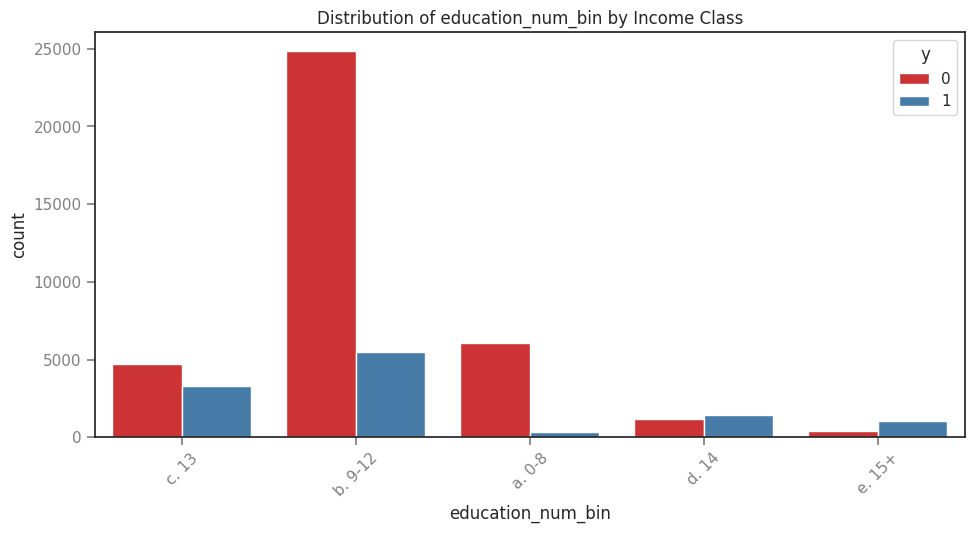

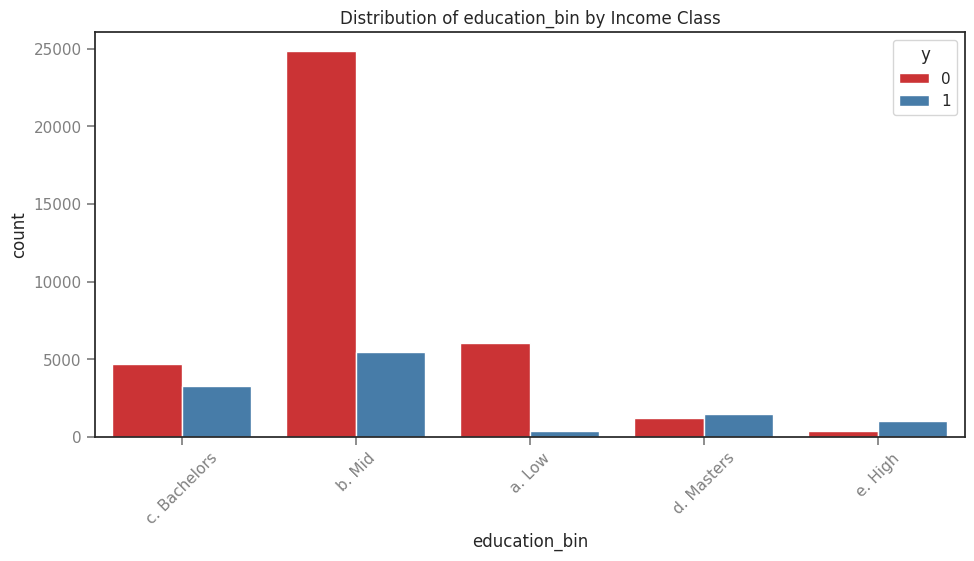

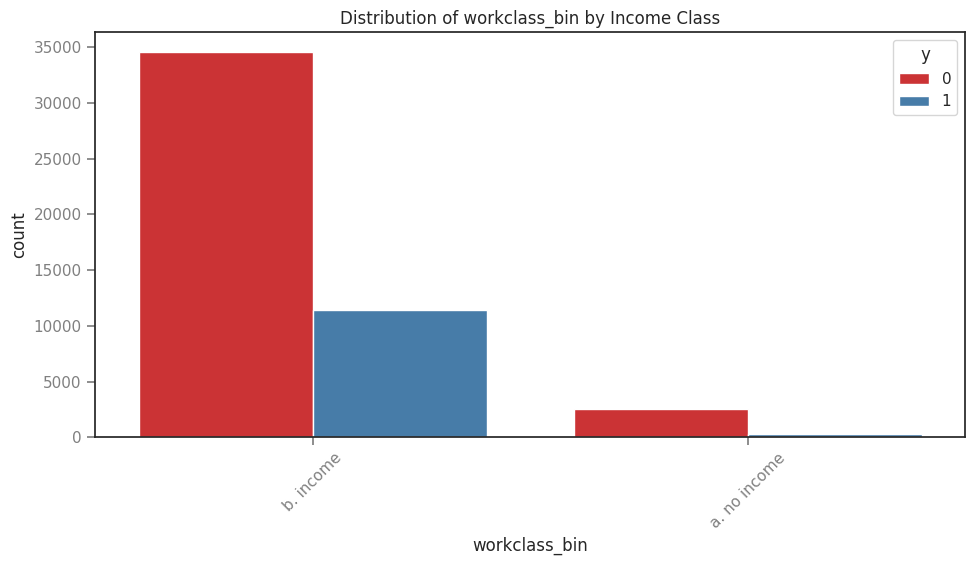

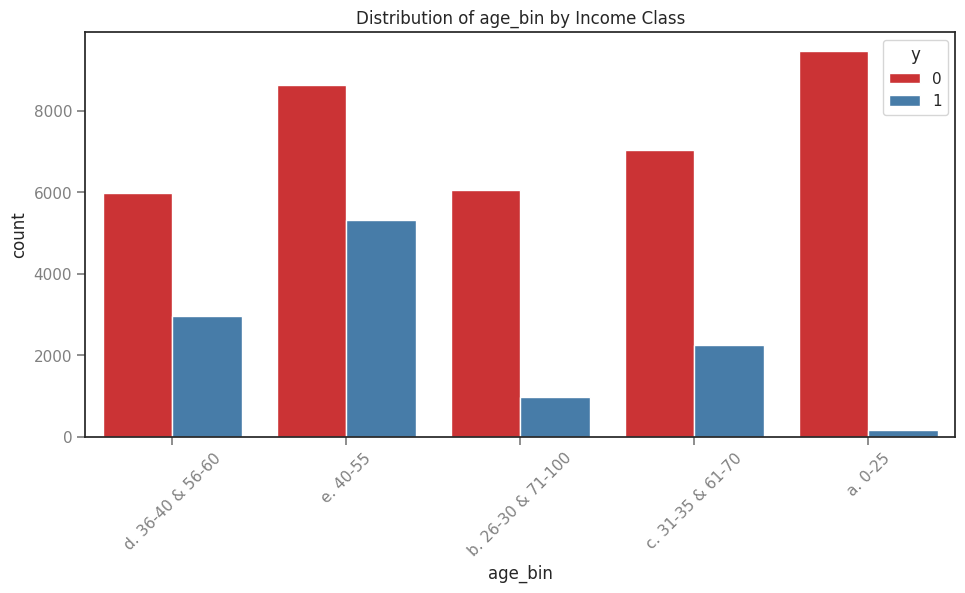

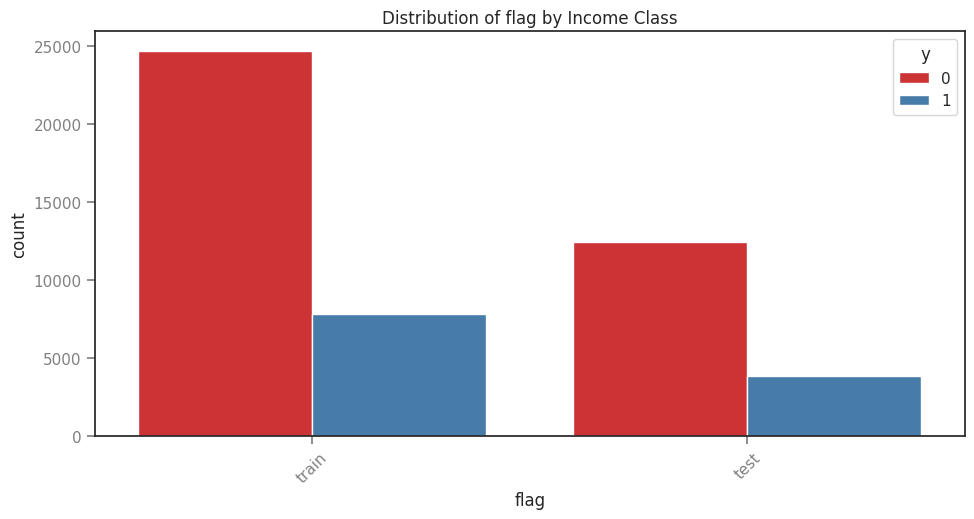

In [36]:
# Identify variables
categorical_vars = df.select_dtypes(include=['object', 'category']).columns
categorical_vars = [col for col in categorical_vars if col != 'y']

numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns
numerical_vars = [col for col in numerical_vars if col != 'y']


for var in categorical_vars:
    plt.figure(figsize=(10,5))
    sns.countplot(x=var, hue='y', data=df)
    plt.title(f'Distribution of {var} by Income Class')
    plt.xticks(rotation=45)
    plt.show()


for var in numerical_vars:
    plt.figure(figsize=(10,5))
    sns.histplot(x=var, hue='y', data=df, kde=False)
    plt.title(f'Distribution of {var} by Income Class')
    plt.show()





Shape of your Data Set loaded: (48842, 11)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  8
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  2
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    10 Predictors classified...
        No variables removed since no ID or low-information variables found in data set

################ Binary_Classification problem #####################
To fix these data qual

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
hours_per_week_bin,object,0.000000,0,,,No issue
occupation_bin,object,0.000000,0,,,No issue
msr_bin,object,0.000000,0,,,No issue
capital_gl_bin,object,0.000000,0,,,No issue
race_sex_bin,object,0.000000,0,,,No issue
education_num_bin,object,0.000000,0,,,No issue
education_bin,object,0.000000,0,,,No issue
workclass_bin,object,0.000000,0,,,No issue
age_bin,object,0.000000,0,,,No issue
flag,object,0.000000,0,,,No issue


No continuous var in data set: drawing categorical distribution plots


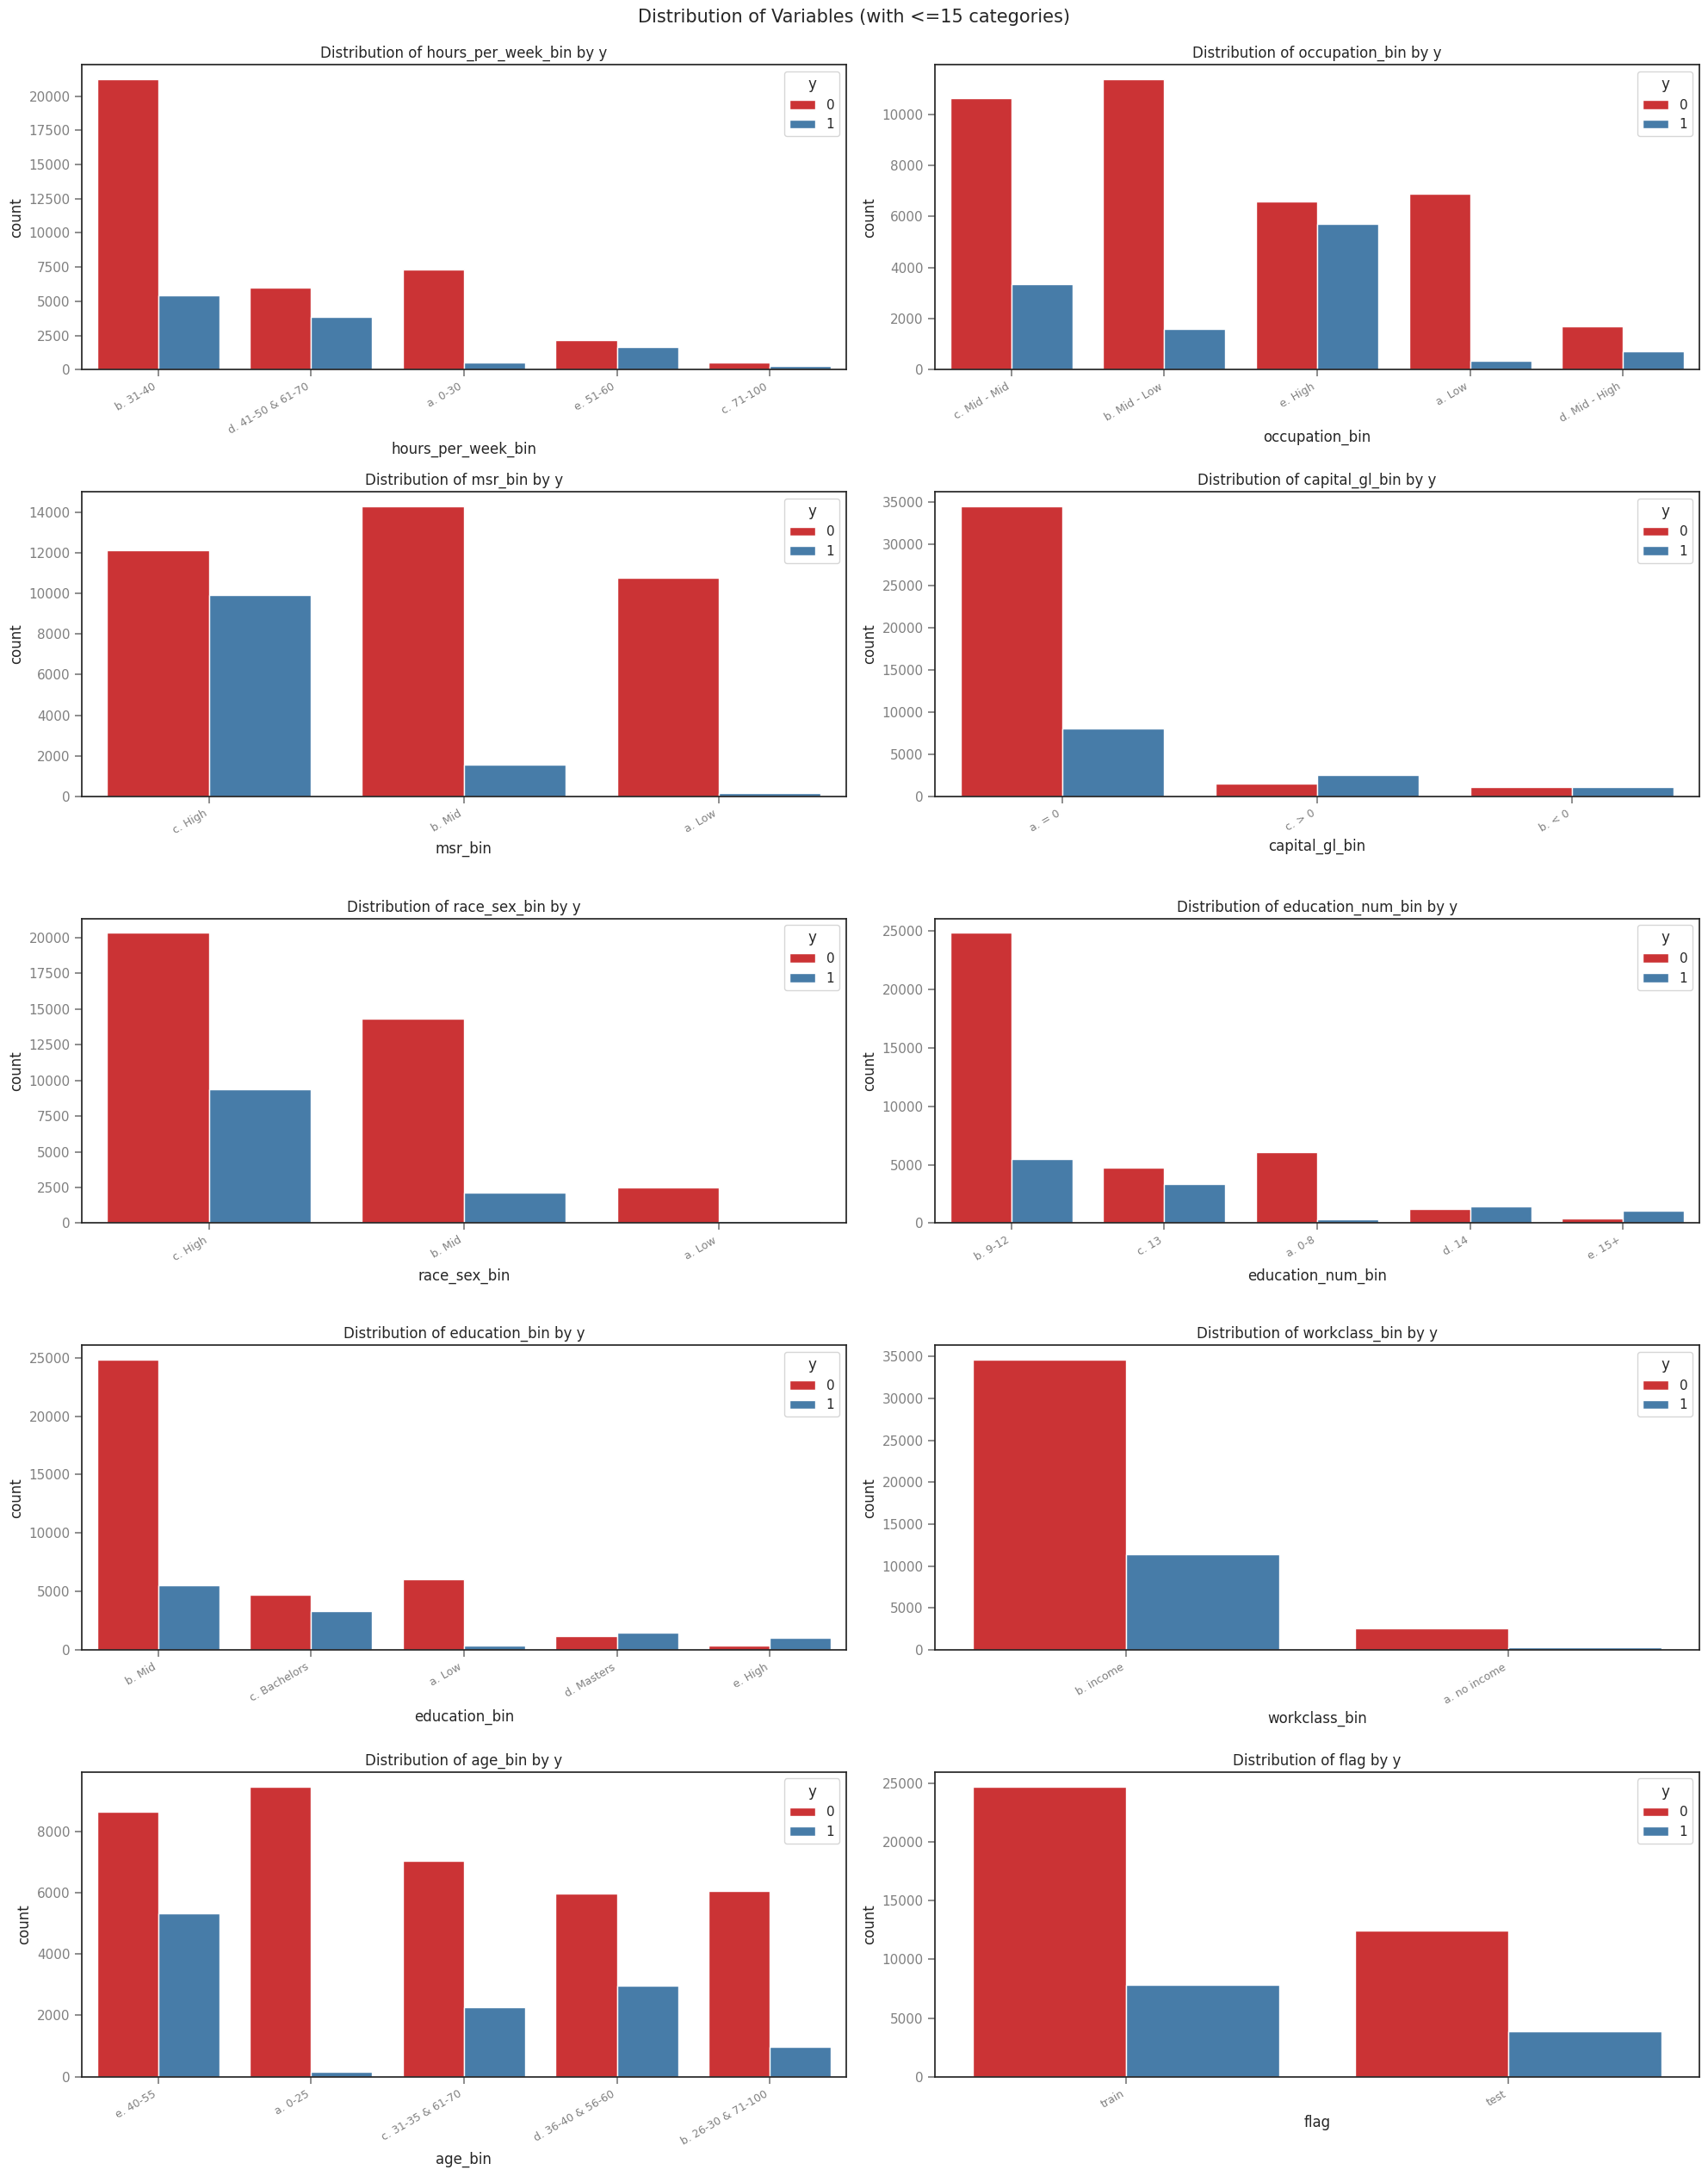

All Plots done
Time to run AutoViz = 13 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0
...,...,...,...,...,...,...,...,...,...,...,...
48837,b. 31-40,e. High,b. Mid,a. = 0,b. Mid,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48838,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,c. 31-35 & 61-70,test,0
48839,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48840,b. 31-40,b. Mid - Low,a. Low,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,test,0


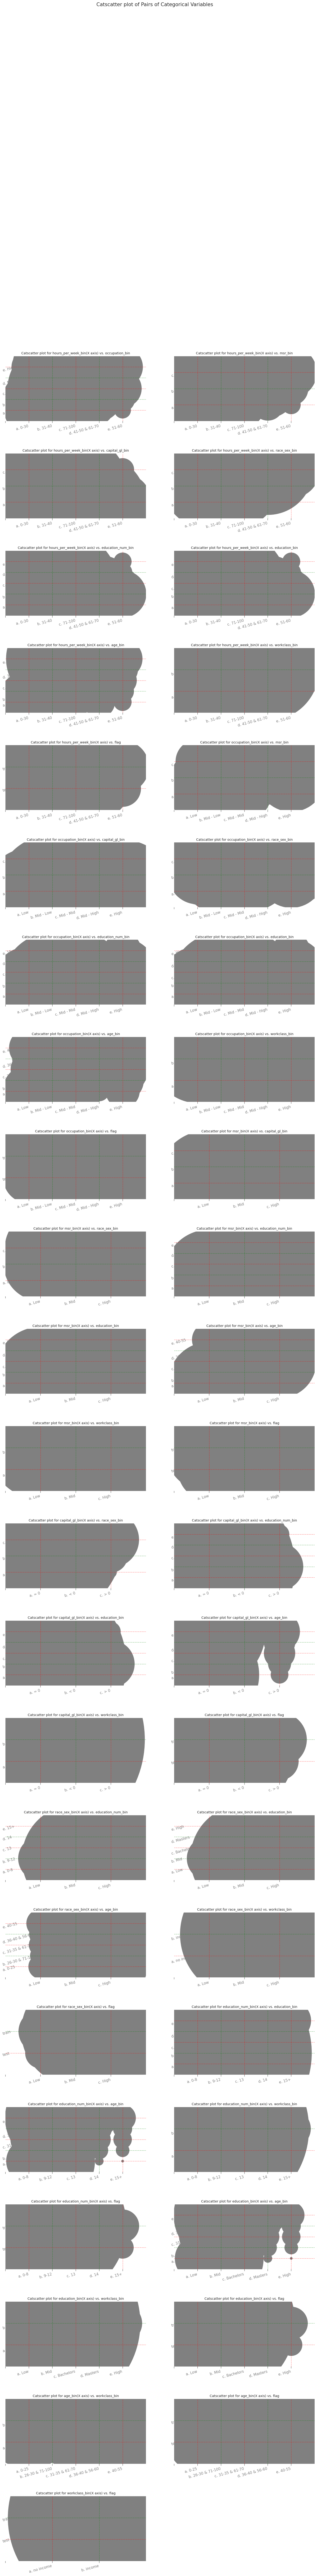

In [37]:
from autoviz.AutoViz_Class import AutoViz_Class

# Initialize AutoViz
AV = AutoViz_Class()

# Generate EDA visuals compared to target variable "y"
AV.AutoViz(
    filename="",
    dfte=df,
    depVar="y",
    verbose=1,              # shows useful summaries
    lowess=False,
    chart_format="svg",     # lighter than png
    max_rows_analyzed=50000,  # faster for your dataset size
    max_cols_analyzed=30
)



###Data Quality Report

In [8]:
data_qualityreport = pd.DataFrame({
    'Column Name': df.columns,
    'Data Types': df.dtypes.values,
    'Unique Values': [df[col].nunique() for col in df.columns],
    'Missing Values': df.isnull().sum().values,
    'Min Value': [df[col].min() if df[col].dtype != 'o' else 'N/A' for col in df.columns],
    'Max Value': [df[col].max() if df[col].dtype != 'o' else 'N/A' for col in df.columns],
})
display(data_qualityreport)

,Column Name,Data Types,Unique Values,Missing Values,Min Value,Max Value
0,hours_per_week_bin,object,5,0,a. 0-30,e. 51-60
1,occupation_bin,object,5,0,a. Low,e. High
2,msr_bin,object,3,0,a. Low,c. High
3,capital_gl_bin,object,3,0,a. = 0,c. > 0
4,race_sex_bin,object,3,0,a. Low,c. High
5,education_num_bin,object,5,0,a. 0-8,e. 15+
6,education_bin,object,5,0,a. Low,e. High
7,workclass_bin,object,2,0,a. no income,b. income
8,age_bin,object,5,0,a. 0-25,e. 40-55
9,flag,object,2,0,test,train


There are no missing values in the dataset and there is no data requiring cleaning.
There are imbalanced classes which is something we should note for our analysis
We are now splitting the dataframes into train and test dataframes. From there we are splitting the data into x and y train as well as x and y test.

In [9]:

train_df = df[df["flag"] == "train"].copy()
test_df  = df[df["flag"] == "test"].copy()

X_train_raw = train_df.drop(columns=["y", "flag"])
y_train = train_df["y"].astype(int)

X_test_raw  = test_df.drop(columns=["y", "flag"])
y_test  = test_df["y"].astype(int)

print("X_train:", X_train_raw.shape, "y_train:", y_train.shape)
print("X_test :", X_test_raw.shape,  "y_test :", y_test.shape)


X_train: (32561, 9) y_train: (32561,)
X_test : (16281, 9) y_test : (16281,)


In [10]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

X_train = ohe.fit_transform(X_train_raw)
X_test  = ohe.transform(X_test_raw)

print("Encoded X_train:", X_train.shape)
print("Encoded X_test :", X_test.shape)


Encoded X_train: (32561, 36)
Encoded X_test : (16281, 36)


# Step 3: Build Decision Tree Classifier Models

## Baseline Decision Tree Model (Default Parameters)

This baseline model provides a starting point for comparison before tuning criterion, min_samples_leaf, max_features, and max_depth.
The model uses the true sklearn default decision tree.


In [11]:
def score_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    cm = confusion_matrix(y_test, pred)

    return {
        "Accuracy": accuracy_score(y_test, pred),
        "Precision": precision_score(y_test, pred, zero_division=0),
        "Recall": recall_score(y_test, pred, zero_division=0),
        "F1": f1_score(y_test, pred, zero_division=0),
        "TN": cm[0,0],
        "FP": cm[0,1],
        "FN": cm[1,0],
        "TP": cm[1,1],
    }


In [12]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
# Baseline model: default DecisionTree settings (only random_state fixed)
baseline_tree = DecisionTreeClassifier(random_state=101)

# Score baseline
baseline_metrics = score_model(baseline_tree, X_train, y_train, X_test, y_test)

baseline_results = pd.DataFrame([{"Model": "Baseline (default params)", **baseline_metrics}])
baseline_results


,Model,Accuracy,Precision,Recall,F1,TN,FP,FN,TP
0,Baseline (default params),0.836435,0.692233,0.553822,0.61534,11488,947,1716,2130


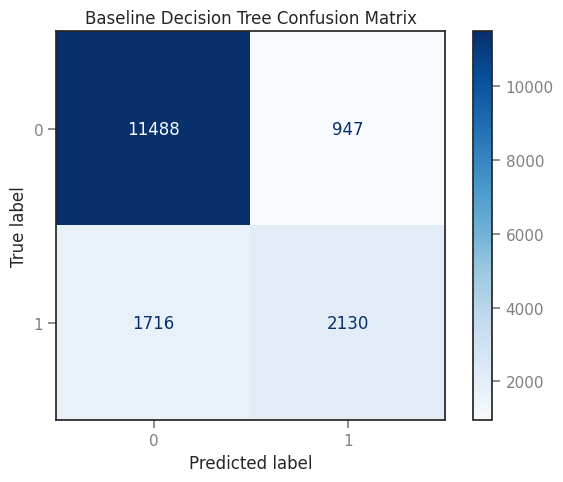

In [13]:
pred_baseline = baseline_tree.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, pred_baseline, cmap=plt.cm.Blues)
plt.title("Baseline Decision Tree Confusion Matrix")
plt.show()

####**The following initial run comes from a pre-tuned custom model based on Professor Brahma's example.**

max_depth=10

random_state=101

max_features= None

min_samples_leaf = 15

In [14]:
dtree = DecisionTreeClassifier(
    max_depth=10,
    random_state=101,
    max_features=None,
    min_samples_leaf=15
)

dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

print("Decision tree model successfully trained")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print()
print("Overall Performance Metrics:")
print("Accuracy:", round(accuracy, 4))
print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))
print("F1 Score:", round(f1, 4))

Decision tree model successfully trained
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90     12435
           1       0.71      0.57      0.63      3846

    accuracy                           0.84     16281
   macro avg       0.79      0.75      0.77     16281
weighted avg       0.84      0.84      0.84     16281

Confusion Matrix:
 [[11538   897]
 [ 1656  2190]]

Overall Performance Metrics:
Accuracy: 0.8432
Precision: 0.7094
Recall: 0.5694
F1 Score: 0.6318


#Step 4: Evaluate Decision Tree Performance

In [15]:
initial_metrics = score_model(dtree, X_train, y_train, X_test, y_test)

initial_run = pd.DataFrame([{
    "Run": "Initial Model",
    **initial_metrics
}])

initial_run


,Run,Accuracy,Precision,Recall,F1,TN,FP,FN,TP
0,Initial Model,0.843191,0.709427,0.569423,0.631761,11538,897,1656,2190


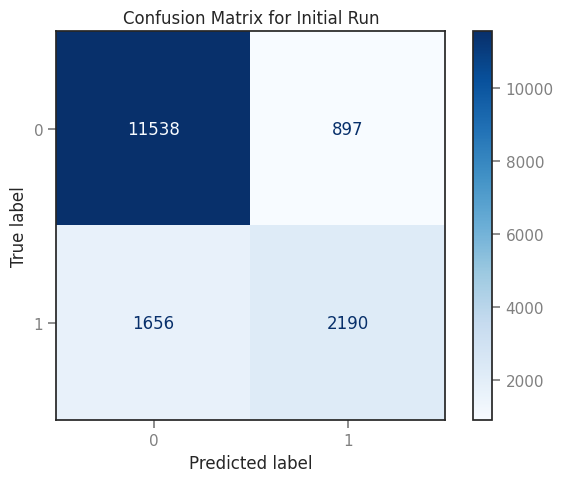

In [16]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=dtree.classes_, cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix for Initial Run")
plt.show()

Using our initial model we get an accuracy of 84%. This means the model correctly predicts whether someone is in the >50k or <50k income class
Specifically the model correctly identifies 93% of the actual  less than $50k income class most likely because of an imbalanced dataset

For the income class making more than 50k, the model only catches 57% of the actual $50k+ individuals.
The model overall works well for identifying individuals making less than 50k but there are also 1,656 false negatives for the 50k+ class meaning the model has more difficulty identifying higher income individuals

#Step 5: Tune Decision Tree Performance

In [17]:
modelrun1 = []

for crit in ["gini", "entropy"]:
    model = DecisionTreeClassifier(criterion=crit, random_state=101)
    metrics = score_model(model, X_train, y_train, X_test, y_test)
    modelrun1.append({"criterion": crit, **metrics})

run1 = pd.DataFrame(modelrun1).sort_values("Accuracy", ascending=False)
run1


,criterion,Accuracy,Precision,Recall,F1,TN,FP,FN,TP
0,gini,0.836435,0.692233,0.553822,0.615340,11488,947,1716,2130
1,entropy,0.835575,0.688366,0.555382,0.614765,11468,967,1710,2136


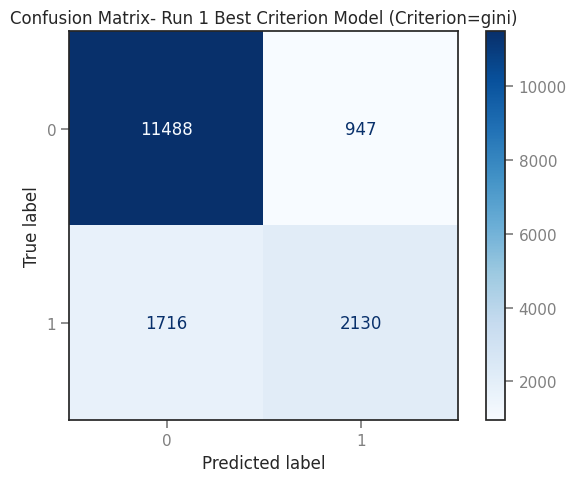

In [18]:
run1_best_crit = run1.iloc[0]["criterion"]
run1_best_model = DecisionTreeClassifier(
    criterion=run1_best_crit,
    random_state=101
)

run1_best_model.fit(X_train, y_train)
run1_pred = run1_best_model.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, run1_pred, cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix- Run 1 Best Criterion Model (Criterion={run1_best_crit})")
plt.show()

In this first run we only split the criterion to Gini Vs Entroy while all other hyperparameters remained at their default values. The Gini criterion had a higher accuracy than Entropy and will be used as the selected split criterion from the first run.

In [19]:
modelrun2 = []

for min_samples_leaf in [5, 10, 15, 20, 25, 30, 35, 40]:
    model = DecisionTreeClassifier(
        criterion=run1_best_crit,     # <- uses best from Run 1
        min_samples_leaf=min_samples_leaf,
        random_state=101
    )
    metrics = score_model(model, X_train, y_train, X_test, y_test)
    modelrun2.append({"min_samples_leaf": min_samples_leaf, **metrics})

run2 = pd.DataFrame(modelrun2).sort_values("Accuracy", ascending=False)
run2


,min_samples_leaf,Accuracy,Precision,Recall,F1,TN,FP,FN,TP
3,20,0.844051,0.714755,0.565523,0.631441,11567,868,1671,2175
4,25,0.843314,0.711532,0.566303,0.630665,11552,883,1668,2178
6,35,0.843069,0.714096,0.559802,0.627605,11573,862,1693,2153
7,40,0.842454,0.713287,0.556942,0.625493,11574,861,1704,2142
5,30,0.842332,0.712670,0.557202,0.625420,11571,864,1703,2143
2,15,0.841963,0.709582,0.560322,0.626180,11553,882,1691,2155
1,10,0.839998,0.701789,0.561102,0.623609,11518,917,1688,2158
0,5,0.838831,0.699282,0.557462,0.620370,11513,922,1702,2144


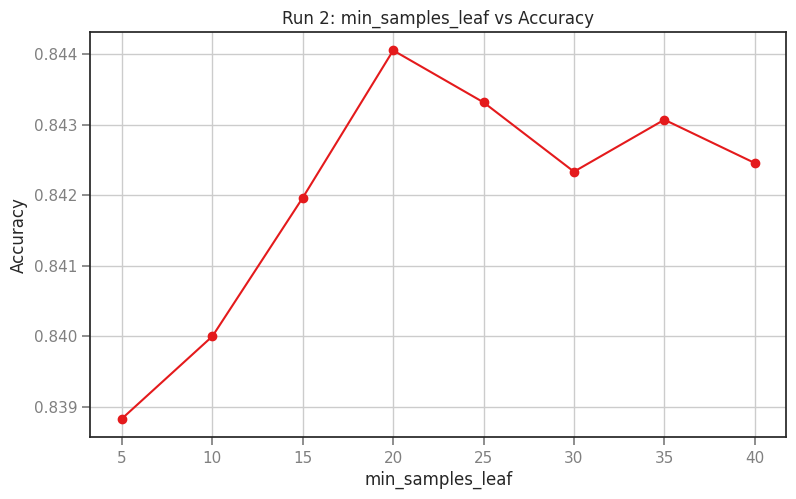

In [20]:
%matplotlib inline
run2_plot = run2.copy().sort_values("min_samples_leaf")

plt.figure(figsize=(8,5))
plt.plot(run2_plot["min_samples_leaf"], run2_plot["Accuracy"], marker="o")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.title("Run 2: min_samples_leaf vs Accuracy")
plt.grid(True)
plt.show()



Using a min_sample_leaf of 5 gives a lower accuracy likely due to overfitting. The accuracy also decreases when we increase the min_sample_leaf to 40 as there is likely some underfitting. A sample with min_sample_leaf=20 has the highest accuracy.

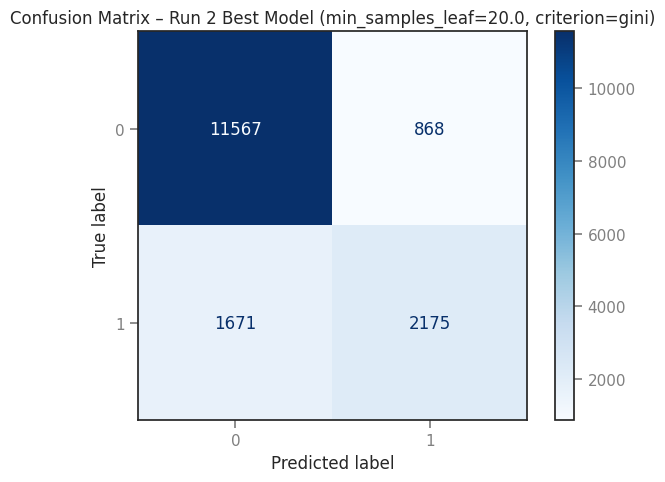

In [21]:
# Get best min_samples_leaf from Run 2 (top row = highest accuracy)
run2_best_leaf = run2.iloc[0]["min_samples_leaf"]
run2_best_leaf
run2_best_model = DecisionTreeClassifier(
    criterion=run1_best_crit,   # from Run 1
    min_samples_leaf=int(run2_best_leaf),  # best from Run 2
    random_state=101
)

run2_best_model.fit(X_train, y_train)
run2_pred = run2_best_model.predict(X_test)
ConfusionMatrixDisplay.from_predictions(
    y_test,
    run2_pred,
    cmap=plt.cm.Blues
)

plt.title(f"Confusion Matrix – Run 2 Best Model (min_samples_leaf={run2_best_leaf}, criterion={run1_best_crit})")
plt.show()


The confusion matrix above shows the performance of the Run 2 Best model where the min_samples_leaf hyperparameter was tuned while keeping the split criterion fixed from run 1. The optimal value identified was min_samples_leaf=20 as this produced the highest accuracy and improves generalization by preventing any overly small leaf nodes. This also helps reduce overfitting compared to lower leaf values.

In [22]:
# Run 3: Tune max_features using best params from Run 1 & Run 2
modelrun3 = []

for max_features in ["sqrt", None, 0.3, 0.4, 0.5, 0.6, 0.8]:
    model = DecisionTreeClassifier(
        criterion=run1_best_crit,            # best from Run 1
        min_samples_leaf=int(run2_best_leaf), # best from Run 2
        max_features=max_features,
        random_state=101
    )

    metrics = score_model(model, X_train, y_train, X_test, y_test)
    modelrun3.append({"max_features": max_features, **metrics})

run3 = pd.DataFrame(modelrun3).sort_values("Accuracy", ascending=False)
run3


,max_features,Accuracy,Precision,Recall,F1,TN,FP,FN,TP
1,None,0.844051,0.714755,0.565523,0.631441,11567,868,1671,2175
2,0.3,0.843929,0.720812,0.553822,0.626378,11610,825,1716,2130
6,0.8,0.843744,0.716711,0.559802,0.628613,11584,851,1693,2153
4,0.5,0.843191,0.706616,0.574883,0.633978,11517,918,1635,2211
3,0.4,0.840550,0.703054,0.562663,0.625072,11521,914,1682,2164
5,0.6,0.840059,0.700581,0.563963,0.624892,11508,927,1677,2169
0,sqrt,0.832197,0.685296,0.535621,0.601284,11489,946,1786,2060


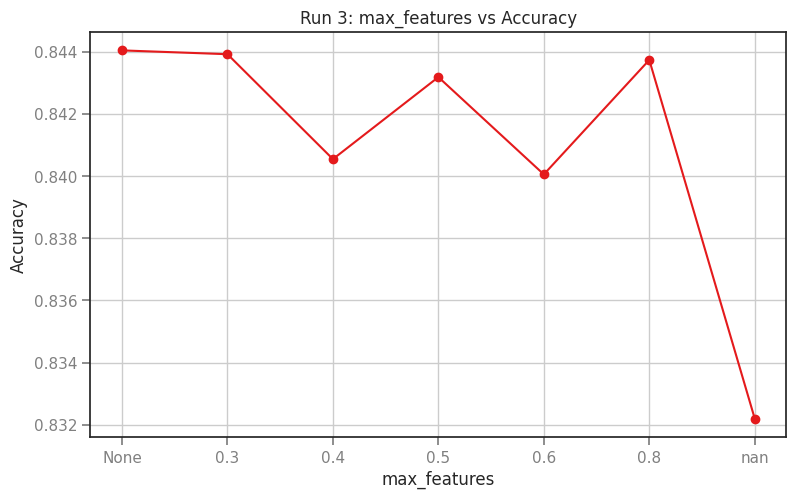

In [23]:
run3_plot = run3.copy()
run3_plot["max_features_label"] = run3_plot["max_features"].astype(object).where(
    run3_plot["max_features"].notna(), "None"
)

# Keep a sensible order for plotting
order = ["None", 0.3, 0.4, 0.5, 0.6, 0.8]
run3_plot["max_features_label"] = pd.Categorical(run3_plot["max_features_label"], categories=order, ordered=True)
run3_plot = run3_plot.sort_values("max_features_label")

plt.figure(figsize=(8,5))
plt.plot(run3_plot["max_features_label"].astype(str), run3_plot["Accuracy"], marker="o")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.title("Run 3: max_features vs Accuracy")
plt.grid(True)
plt.show()


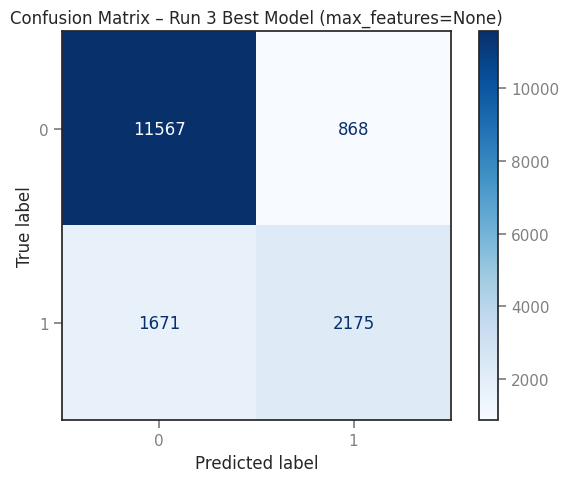

In [24]:
run3_best_max_features = run3.iloc[0]["max_features"]
run3_best_max_features
run3_best_model = DecisionTreeClassifier(
    criterion=run1_best_crit,
    min_samples_leaf=int(run2_best_leaf),
    max_features=run3_best_max_features,
    random_state=101
)

run3_best_model.fit(X_train, y_train)
run3_pred = run3_best_model.predict(X_test)

ConfusionMatrixDisplay.from_predictions(
    y_test,
    run3_pred,
    cmap=plt.cm.Blues
)

plt.title(f"Confusion Matrix – Run 3 Best Model (max_features={run3_best_max_features})")
plt.show()


In [25]:
# Best params from previous runs
run4_crit = run1_best_crit
run4_leaf = int(run2_best_leaf)
run4_maxfeat = run3_best_max_features  # set this from Run 3 best row

# If max_features is NaN, use None
if isinstance(run4_maxfeat, float) and np.isnan(run4_maxfeat):
    run4_maxfeat = None

modelrun4 = []

for max_depth in [2, 4, 6, 8, 10, 12, 14, 16]:
    model = DecisionTreeClassifier(
        criterion=run4_crit,
        min_samples_leaf=run4_leaf,
        max_features=run4_maxfeat,
        max_depth=max_depth,
        random_state=101
    )
    metrics = score_model(model, X_train, y_train, X_test, y_test)
    modelrun4.append({"max_depth": max_depth, "max_features": run4_maxfeat, **metrics})

# Table for selecting best depth
run4 = pd.DataFrame(modelrun4).sort_values("Accuracy", ascending=False)
run4


,max_depth,max_features,Accuracy,Precision,Recall,F1,TN,FP,FN,TP
4,10,None,0.845955,0.718342,0.572283,0.637048,11572,863,1645,2201
5,12,None,0.844420,0.710080,0.576963,0.636637,11529,906,1627,2219
7,16,None,0.844051,0.714755,0.565523,0.631441,11567,868,1671,2175
6,14,None,0.843744,0.712052,0.568383,0.632157,11551,884,1660,2186
3,8,None,0.843314,0.717647,0.555122,0.626008,11595,840,1711,2135
2,6,None,0.840550,0.692426,0.584763,0.634057,11436,999,1597,2249
1,4,None,0.827590,0.705417,0.463859,0.559686,11690,745,2062,1784
0,2,None,0.816596,0.695455,0.397816,0.506120,11765,670,2316,1530


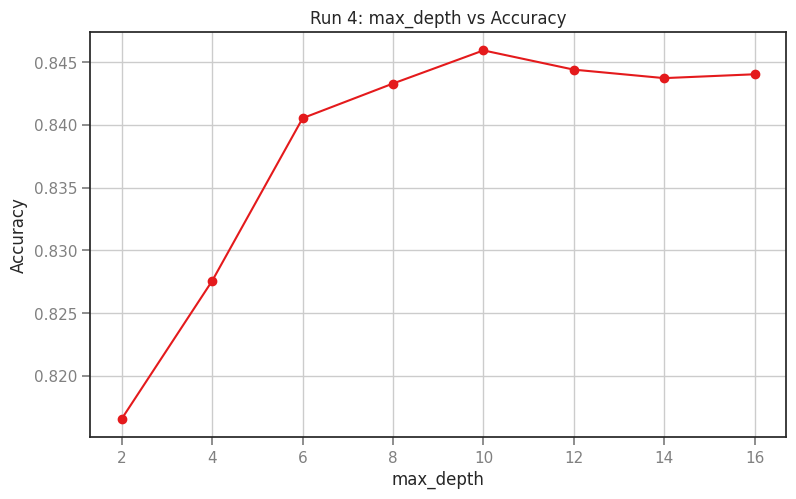

In [26]:
run4_plot = run4.sort_values("max_depth")
plt.figure(figsize=(8,5))
plt.plot(run4_plot["max_depth"], run4_plot["Accuracy"], marker="o")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("Run 4: max_depth vs Accuracy")
plt.grid(True)
plt.show()


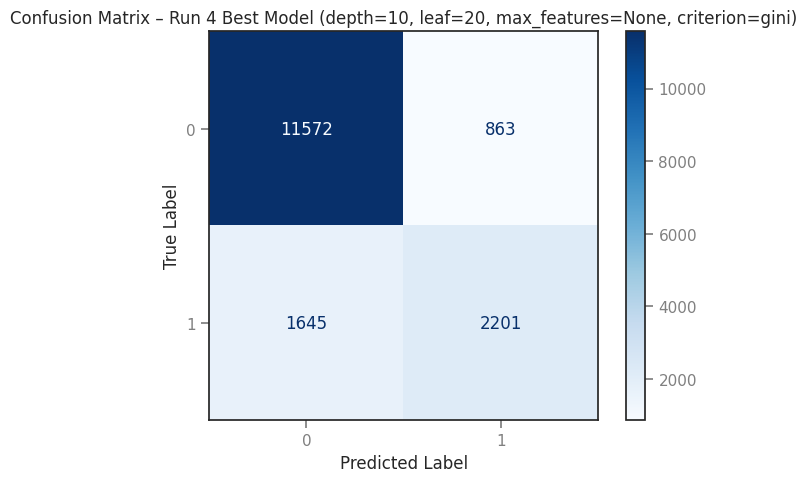

In [27]:
best_max_depth = int(run4.iloc[0]["max_depth"])
best_max_depth
from sklearn.tree import DecisionTreeClassifier

run4_best_model = DecisionTreeClassifier(
    criterion=run1_best_crit,                 # Best from Run 1
    min_samples_leaf=int(run2_best_leaf),     # Best from Run 2
    max_features=run3_best_max_features,      # Best from Run 3
    max_depth=best_max_depth,                 # Best from Run 4
    random_state=101
)

run4_best_model.fit(X_train, y_train)
run4_pred = run4_best_model.predict(X_test)
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(
    y_test,
    run4_pred,
    cmap=plt.cm.Blues
)

plt.title(
    f"Confusion Matrix – Run 4 Best Model "
    f"(depth={best_max_depth}, leaf={int(run2_best_leaf)}, "
    f"max_features={run3_best_max_features}, criterion={run1_best_crit})"
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


##Question 3: Decision Tree Hyper Parameter Variation vs Performance

Run 1: Comparison of Split Criteria (Gini vs entropy)
- Gini had the highest accuracy so it was used for the following runs

Run 2: Variation of min_samples_leaf
- Best value for min_samples_leaf is 20 based on accuracy and the line plot

Run 3: Variation of max_features
- Best value for max_features was None based on accuracy

Run 4: Variation of max_depth
- Best value for max_depth was 10 based on accuracy




In [28]:
best_model_run5 = DecisionTreeClassifier(
    criterion=run1_best_crit,
    min_samples_leaf=int(run2_best_leaf),
    max_features=run3_best_max_features,
    max_depth=best_max_depth,
    random_state=101
)

best_model_run5  # display config


DecisionTreeClassifier(max_depth=10, min_samples_leaf=20, random_state=101)

In [29]:
start_time = time.perf_counter()

best_model_run5.fit(X_train, y_train)

end_time = time.perf_counter()
run5_training_time = end_time - start_time

print(f"Training Time for Best Model (Run 5): {run5_training_time:.4f} seconds")

# Now predict (no retraining)
run5_pred = best_model_run5.predict(X_test)

# Then compute metrics manually (cleaner than score_model)
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

cm = confusion_matrix(y_test, run5_pred)

run5_df = pd.DataFrame([{
    "Run": "Run 5 (Final Best Model)",
    "Accuracy": accuracy_score(y_test, run5_pred),
    "Precision": precision_score(y_test, run5_pred, zero_division=0),
    "Recall": recall_score(y_test, run5_pred, zero_division=0),
    "F1": f1_score(y_test, run5_pred, zero_division=0),
    "TN": cm[0,0],
    "FP": cm[0,1],
    "FN": cm[1,0],
    "TP": cm[1,1],
    "Training_Time_sec": run5_training_time
}])

run5_df


Training Time for Best Model (Run 5): 0.3195 seconds


,Run,Accuracy,Precision,Recall,F1,TN,FP,FN,TP,Training_Time_sec
0,Run 5 (Final Best Model),0.845955,0.718342,0.572283,0.637048,11572,863,1645,2201,0.319521


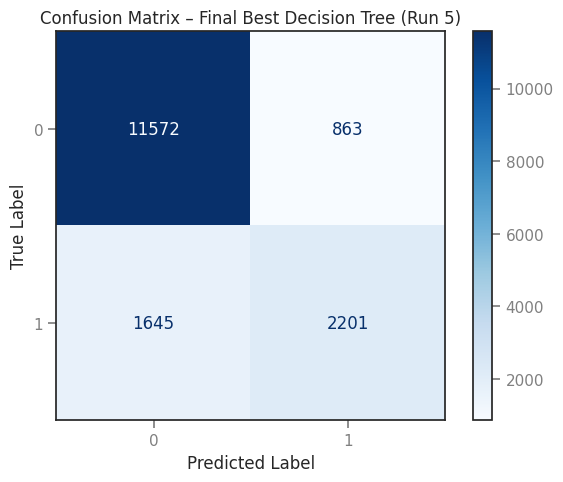

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

run5_pred = best_model_run5.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, run5_pred, cmap=plt.cm.Blues)
plt.title("Confusion Matrix – Final Best Decision Tree (Run 5)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


The final tuned model had a more balanced confusion matrix with more true positive predictions and a lower amount of false positives. The systematic tuning improved model accuracy and reduced missclassification if even just a little.

#Step 6: Visualize your Best Decision Tree using GraphViz

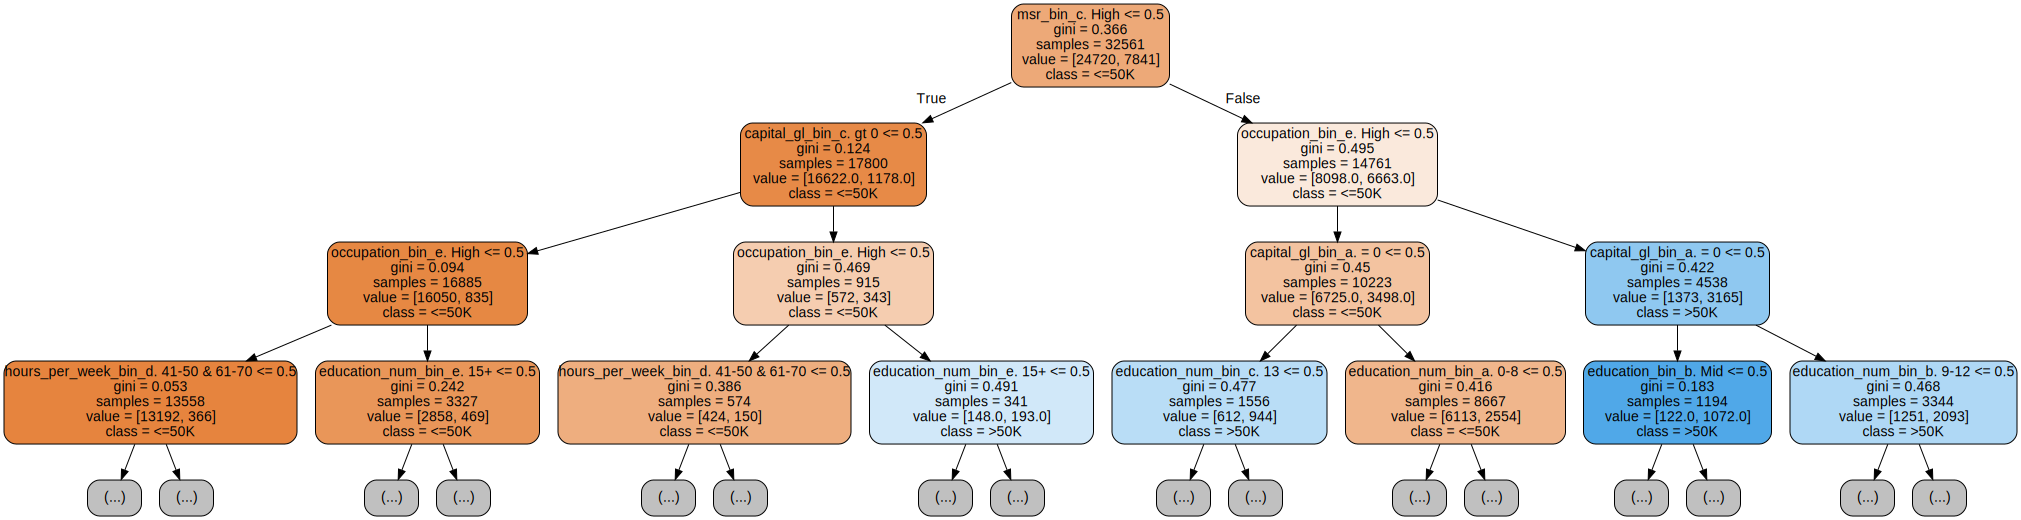

In [31]:
from sklearn.tree import export_graphviz
import graphviz
import re

# Real OneHotEncoder feature names
real_names = list(ohe.get_feature_names_out())

# Sanitize names so GraphViz DOT parser won't crash
def sanitize(name: str) -> str:
    name = name.replace(";", "_")
    name = name.replace("[", "(").replace("]", ")")
    name = name.replace("<", "lt").replace(">", "gt")
    name = name.replace('"', "'")
    name = re.sub(r"\s+", " ", name)
    return name

safe_real_names = [sanitize(n) for n in real_names]

dot_data = export_graphviz(
    best_model_run5,
    out_file=None,
    feature_names=safe_real_names,
    class_names=["<=50K", ">50K"],
    filled=True,
    rounded=True,
    special_characters=False,
    max_depth=3
)
#Note: The model is trained with max_depth=10 (best hyperparameter), but the GraphViz visualization is limited to depth=3 for readability.

graph = graphviz.Source(dot_data)
graph


### Decision Tree Interpretation
 **occupation_bin** categories:

a. Low → Manual labor, service, basic jobs  
b. Mid-Low → Clerical, sales, basic technical roles  
c. Mid → Skilled trades, technicians  
d. Mid-High → Specialized or supervisory roles  
e. High → Executive, managerial, professional occupations

 **education_bin** categories:

a. Low → Less than high school  
b. Mid → High school graduate  
c. Mid-High → Some college / Associate degree  
d. High → Bachelor’s degree  
e. Very High → Graduate / Professional degrees

 **education_num_bin** categories:

a. 0–8 years → Elementary education  
b. 9–12 years → High school level  
c. 13–14 years → Some college  
d. 15+ years → College and above

 **msr_bin** categories:

a. Low → Single, never married, not in family  
b. Mid → Divorced, separated, less stable household  
c. High → Married-civ-spouse / strong household structure

**capital_gl_bin** categories:

a. 0 → No capital gain  
c. >0 → Has positive capital gain (investments/assets)

**hours_per_week_bin** categories:

a. 0–20 → Very low hours (part-time)  
b. 21–30 → Part-time  
c. 31–40 → Standard full-time  
d. 41–50 → Above full-time  
e. 51+ → Very high work hours

**race_sex_bin** categories:

a. Low  
b. Mid  
c. High  


In [32]:
graph = graphviz.Source(dot_data, format="png")
graph.render("best_tree_graphviz", cleanup=True)


'best_tree_graphviz.png'

#Step 7 Conclusion:

In [33]:
# Used AI to figure out code that would check for overfitting: compare train vs test accuracy
train_pred = best_model_run5.predict(X_train)
test_pred = best_model_run5.predict(X_test)

from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

print("Training Accuracy:", round(train_acc, 4))
print("Testing Accuracy:", round(test_acc, 4))
print("Accuracy Gap:", round(train_acc - test_acc, 4))

if train_acc - test_acc > 0.05:
    print('Model may be overfitting (large train-test gap).')
else:
    print('No significant overfitting detected (train and test accuracy are very similar).')



Training Accuracy: 0.847
Testing Accuracy: 0.846
Accuracy Gap: 0.001
No significant overfitting detected (train and test accuracy are very similar).


## Question 4: How long was your total run time to train the best model?
The training time varies slightly from run to run due to normal system and CPU load. The average training time was approximately between 0.07 and 0.08 seconds.This shows the model is computationally efficient with the optimal hyperparameters.

## Question 5: Did you find the BEST Tree?
Yes we found the best tree through a hyperparameter tuning process across four runs.
In the first run we compared split criteria and Gini showed better accuracy than entropy.
In the second run we tuned using the minimum samples per leaf and found that 20 produced the highest accuracy.
The third run evaluated different max_feature values and we selected "None" as having the best accuracy.
The fourth run compared different max_depth values and a depth of 10 provided the best balance between performance and model complexity.

We then ran this combination of best hyperparameters as our best model and got the highest accuracy among all tested models. We were able to find the best tree using systematic model tuning.

## Question 6: Write your observations from the visualization of the best tree?
From the visualization of the best decision tree we can see that the root node splits on the relationship stability bin meaning that marital status and household structure are important predictors of income classification in this model. This suggests that individuals with higher relationship stability are associated with higher income outcomes.

The early splits of our tree focus heavily on the key socioeconomic variables like capital gain, occupation category and education level. Financial indicators and human capital variables also are important for distinguishing between income classes. Branches with positive capital gain and higher education bins tend to be classified as >50k income classifications while lower capital gain and lower occupation are associated with <50k income predictions.

The hours worked per week bin appears later on in the splits so while it may not be the most important factor, it is still necessary for refining income predictions.

The darker intensity notes indicate a higher confidence in classifications.

## Question 7: Will this tree overfit? (Is this tree fully grown?)
This tree is not fully grown and is not likely overfitting. The model uses tuned hyperparameters like a maximum depth limit and a minimum samples per leaf (20) which help to prevent the tree from becoming too complex. These hyperparameters also are methods of regularization that help to reduce the variance and improve generalization to unseen data.

This is supported by the insignificant gap between train and test data accuracy which confirms strong generalization and no meaningful overfitting.

#Step 8: Prediction using "trained" Decision Tree model

In [34]:
new_individual = pd.DataFrame({
    "hours_per_week_bin": ["d. 41-50"],
    "occupation_bin": ["d. Mid-Low"],
    "msr_bin": ["c. High"],                 # “Marriage status & relationships = high”
    "capital_gl_bin": ["c. > 0"],           # “capital gain = yes”
    "race_sex_bin": ["b. Mid"],             # “race sex group = mid”
    "education_num_bin": ["b. 9-12"],
    "education_bin": ["e. High"],           # “education category = high”
    "workclass_bin": ["b. income"],         # “work class = income”
    "age_bin": ["d. 56-60"]
})


# Encode the new individual using the same OneHotEncoder
new_individual_encoded = ohe.transform(new_individual)
# Predict the income class for the new individual
predicted_class = best_model_run5.predict(new_individual_encoded)
class_labels = ["Less than 50k (<50K)", "More than 50k (>50K)"]
print("Predicted income class for the new individual:", class_labels[predicted_class[0]])

Predicted income class for the new individual: More than 50k (>50K)


In [35]:
print("Predicted class (0 = <=50K, 1 = >50K):", predicted_class[0])
proba = best_model_run5.predict_proba(new_individual_encoded)
print("Probability for <=50K:", proba[0][0])
print("Probability for >50K:", proba[0][1])
print("Model confidence:", proba.max())



Predicted class (0 = <=50K, 1 = >50K): 1
Probability for <=50K: 0.28858024691358025
Probability for >50K: 0.7114197530864198
Model confidence: 0.7114197530864198


## Question 8: What is the probability that your prediction for this person is correct?
The model predicts class 1 (>50k income) with a probability of about 71.14%  representing the model's confidence in its prediction. Based on the learned decision boundaries and feature patterns from training, the model estimates a 71% likelihood that the individual belongs to the >50k income class.